In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Load the dataset
file_path = "C:/Users/shanm/Downloads/spotify.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Preprocessing steps
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.drop(['explicit', 'key', 'mode', 'time_signature'], axis=1, inplace=True)
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])
features_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'loudness']
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


# List of features used for the recommendation (should match your preprocessing)
features_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'loudness']

# Initialize and fit the Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
nn_model.fit(df[features_to_normalize])

# Define the recommendation function
def recommend_songs(song_indices, num_of_songs_per_input=5):
    all_recommendations = []

    for index in song_indices:
        # Extract the features of the input song as a DataFrame
        input_song_features = df[features_to_normalize].iloc[index:index+1]

        # Find nearest neighbors for the input song
        distances, indices = nn_model.kneighbors(input_song_features, n_neighbors=num_of_songs_per_input + 1)
        
        # Fetch recommendations for each song and append to the list
        recommendations = df.iloc[indices.flatten()[1:]][['Index', 'artists', 'album_name', 'track_name']]  # Skip the first index (the song itself)
        all_recommendations.append(recommendations)

    # Concatenate all recommendations into one DataFrame, remove duplicates and reset index for clean output
    all_recommendations_df = pd.concat(all_recommendations).drop_duplicates().reset_index(drop=True)
    return all_recommendations_df

# Example user input: Replace these indices with the ones provided by the user
user_input_indices = [0, 1, 2] 

# Generate and display recommendations
combined_recommendations = recommend_songs(user_input_indices)
print(combined_recommendations)

     Index                artists                        album_name  \
0   102151            Gen Hoshino                            Comedy   
1    99152            Gen Hoshino                            Comedy   
2    62102            Gen Hoshino                            Comedy   
3     5688          Kenshi Yonezu                       STRAY SHEEP   
4   103809     The Japanese House                Saw You in a Dream   
5        1           Ben Woodward                  Ghost (Acoustic)   
6    93166           Oleg Pogudin             Я сохраню слова любви   
7    93800    Alexander Vertinsky    Волшебный Мир Русского Романса   
8    93984  Konstantin Pluzhnikov                 Встреча (Meeting)   
9    93157  Valentina Ponomaryova                  Любимые песни.ru   
10  113365           Phil Wickham  Living Hope (The House Sessions)   
11   19490              Kip Moore                  Tailgate Country   
12  107933           Étienne Daho      L'invitation (2011 Remaster)   
13   3

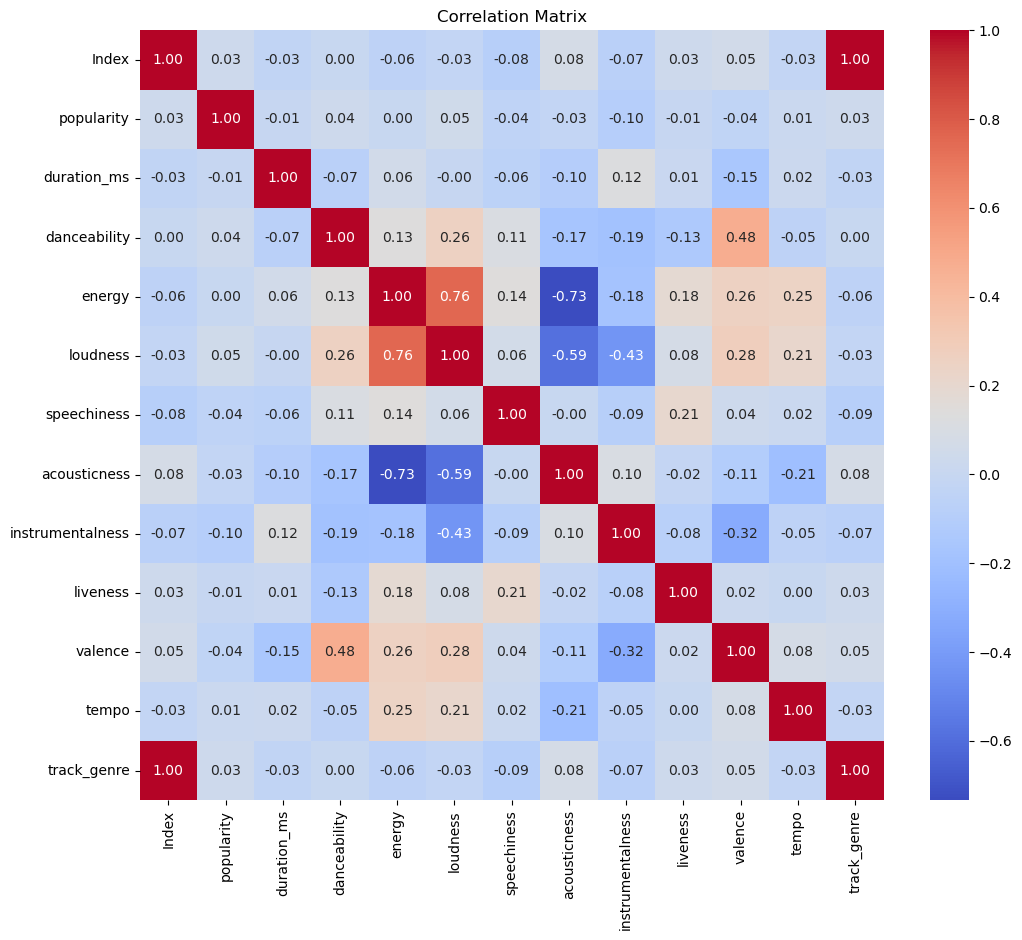

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can replace this line with your dataset loading code.

# Assuming the features for correlation are all numeric
numeric_features = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

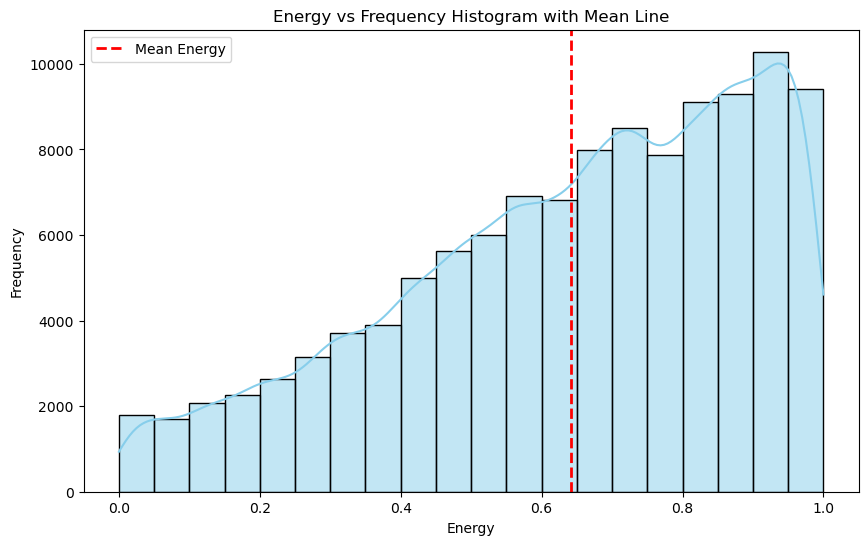

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can replace this line with your dataset loading code.

# Plotting the histogram with a line
plt.figure(figsize=(10, 6))

# Creating a histogram
sns.histplot(data=df, x='energy', bins=20, kde=True, color='skyblue')

# Adding a vertical line representing the mean
plt.axvline(x=df['energy'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Energy')

# Adding labels and title
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Energy vs Frequency Histogram with Mean Line')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

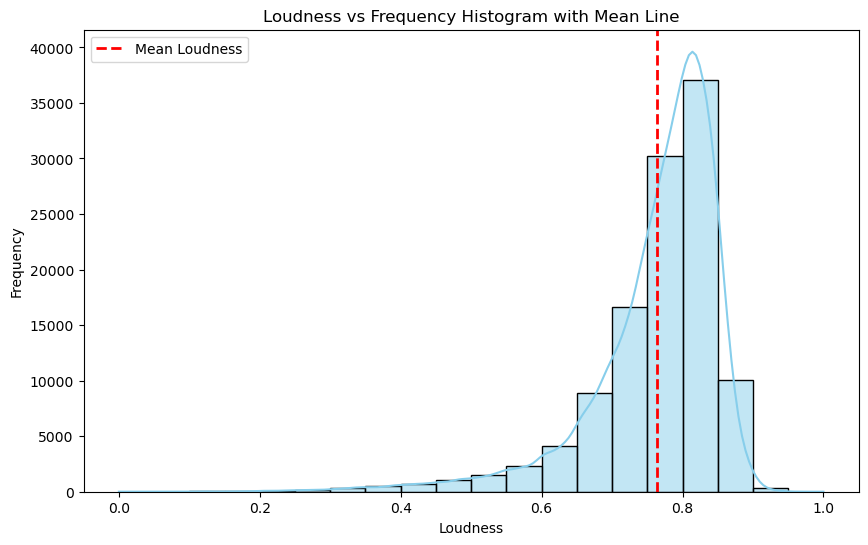

In [7]:
# Plotting the histogram with a line
plt.figure(figsize=(10, 6))

# Creating a histogram
sns.histplot(data=df, x='loudness', bins=20, kde=True, color='skyblue')

# Adding a vertical line representing the mean
plt.axvline(x=df['loudness'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Loudness')

# Adding labels and title
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.title('Loudness vs Frequency Histogram with Mean Line')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

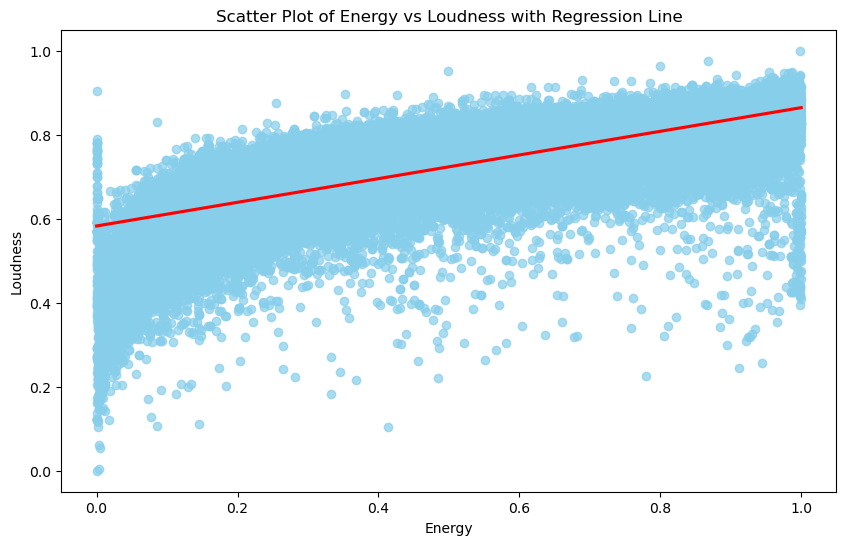

In [11]:
# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))

# Creating a scatter plot with a regression line
sns.regplot(data=df, x='energy', y='loudness', color='skyblue', scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Scatter Plot of Energy vs Loudness with Regression Line')

# Display the plot
plt.show()

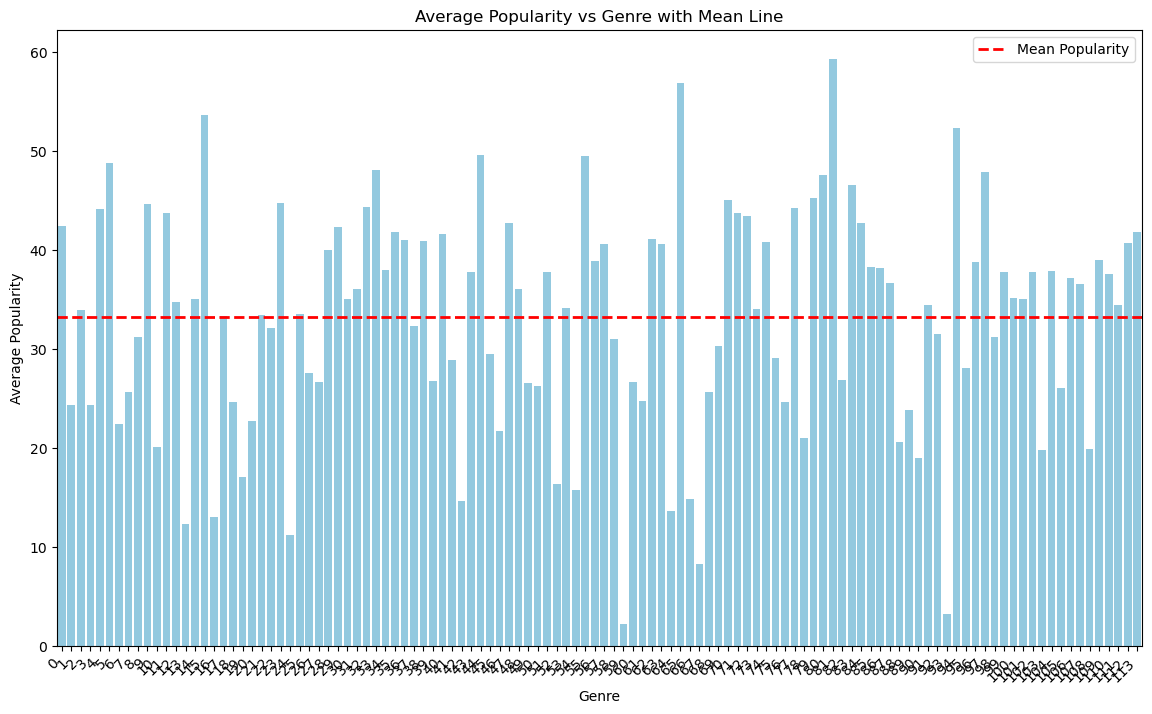

In [12]:
# Grouping by genre and calculating the mean popularity
genre_avg_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()

# Plotting the histogram with a line
plt.figure(figsize=(14, 8))

# Creating a bar plot for average popularity by genre
sns.barplot(x='track_genre', y='popularity', data=genre_avg_popularity, color='skyblue')

# Adding a horizontal line representing the mean popularity
plt.axhline(y=genre_avg_popularity['popularity'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Popularity')

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity vs Genre with Mean Line')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding a legend
plt.legend()

# Display the plot
plt.show()